# Respiratory Physiology

## The Basic Model
The lungs can be modeled as a narrow tube, or straw, and balloon that is open to the outside world. 
The narrow tube models the airways of the lungs, with a resistance that we will label $R$.
The balloon is the collection of all air sacs, or alveoli, that expands and recoils during inspiration and expiration. The lungs expand with a compliance $C$, which is equivalent to the inverse of elasticity, $e$. $C = \frac{1}{e}$.

The pressure inside the lungs depend on two things. First, it depends on the actual volume of lungs, $V$, in the lungs at any moment of time. As an analogy, suppose a balloon is blown up to a large volume $V$, and the end is closed off so the air cannot escape. The balloon will have a high pressure, that will become apparent once one the end is released, allowing a huge rush of air to flow from the balloon to the outside world. Flow of air moves from an area of high pressure to an area of low pressure. The compliance of the balloon relates the pressure difference to the amount of volume:
\begin{equation} \label{eq:plat}
P_{plat} = \frac{V}{C}
\end{equation}
(This pressure will be called the ``plateau pressure'' for reasons to be described soon)

Secondly, the pressure depends on the actual flow of air, $\dot V = \frac{d V}{d t}$, through the narrow tube. A pressure difference across the narrow tube will cause flow through the tube, but the resistance will decrease the flow. The relation with the resistance $R$ is as follows:
\begin{equation} \label{eq:res}
P_{res} = R\dot V
\end{equation}

Together, with the lungs filled up to a volume V that is open to the outside world with a pressure difference $\Delta P = P_{res} + P_{plat}$, then
\begin{equation} \label{eq:RCeq}
\Delta P = \frac{V}{C} + R\dot V
\end{equation}
This produces a differential equation, where we assume $C$ and $R$ are constants, which can however vary in certain conditions. For example, the resistance $R$ in the airway can increase with mucous plugging. The compliance $C$ can go up in pathologic conditions like acute respiratory distress syndrome (ARDS) or when the lungs become stiff in certain chronic conditions like emphysema or COPD. 

## Solving Eq.~(\ref{eq:RCeq})
Rearranging and isolating the $\dot V$ term gives
\begin{equation}
\dot V + \frac{V}{RC} = \frac{P}{R}
\end{equation}
There are multiple ways of solving this equation, but one instructive way of doing this is to use \textit{integrating factors}. Define a new variable $W(t)$ such that 
\begin{equation} \label{eq:wdef}
W(t) = e^{\frac{t}{RC}}V. 
\end{equation}
$\left[e^{\frac{t}{RC}}\right]$ is known as the integrating factor. Then by using the chain rule from calculus,
\begin{equation}
\frac{dW}{dt} = \frac{d}{dt}\left[e^{\frac{t}{RC}}V\right] = e^{\frac{t}{RC}}\left[\dot V + \frac{V}{RC}\right] = e^{\frac{t}{RC}}\frac{P}{R}.
\end{equation}
Integrating both sides with respect to $t$ gives
\begin{equation}
W(t) = W(0) + \int_0^t e^{\frac{s}{RC}}\frac{P}{R}\,ds.
\end{equation}
Relating $W$ with $V$ as in Eq.~(\ref{eq:wdef}) gives
\begin{equation}
e^{\frac{t}{RC}}V(t) = V(0) + \int_0^t e^{\frac{s}{RC}}\frac{P}{R}\,ds
\end{equation}
or equivalently,
\begin{equation} \label{eq:volume}
\boxed{V(t) = e^{-\frac{t}{RC}}V(0) + \int_0^t e^{\frac{s-t}{RC}}\frac{P}{R}\,ds.}
\end{equation}
The flow therefore is the following:
\begin{equation}
\boxed{\dot V(t) = \frac{P}{R} - \frac{e^{-\frac{t}{RC}V(0)}}{RC} - \int_0^t e^{\frac{s-t}{RC}}\frac{P}{R^2C}\,ds.}
\end{equation}
Here the only assumptions we make are that $R$ and $C$ are constants. 

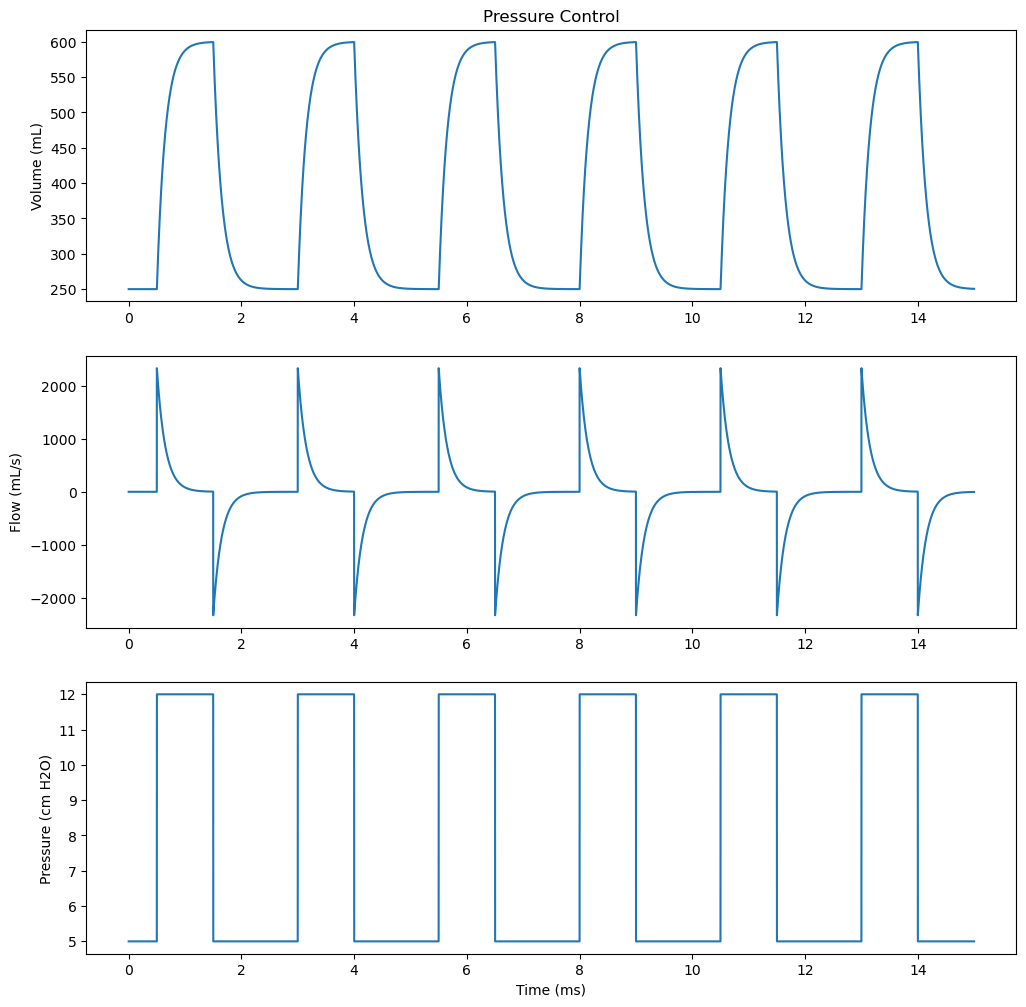

In [9]:
import numpy as np
import matplotlib.pyplot as plt

R = 0.003 #2-3 cm H2O/L/s, converted to cm H2O/mL/s
C = 50 #50-100 mL/cm H2O
peep = 5 #3-5 cm H2O
pressurecontrol = 7
RR = 24
breathduration=1

def dv(v,p): #pressure is controlled
    return(p/R - v/(R*C))

dt = 0.001
T = 15 - dt/2
t = np.arange(0,T+dt/2,dt)
Ps = np.arange(0,T+dt/2,dt)
Vs = np.arange(0,T+dt/2,dt)
Vsdot = np.arange(0,T+dt/2,dt)

Vs[0] = C*peep

inspiretime = 1
timenextbreath = 0.5
for i in range(len(t)):
    thistime = t[i]
    if (t[i] > timenextbreath - dt/2 and t[i] < timenextbreath + breathduration):
        Ps[i] = peep+pressurecontrol
    else:
        Ps[i] = peep
    
    Vsdot[i] = dv(Vs[i],Ps[i])
    if (i < len(t)-1):
        Vs[i+1] = Vs[i] + dt*Vsdot[i]
    
    if (thistime > timenextbreath + breathduration + dt/2):
        timenextbreath = timenextbreath + 60/RR

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.title('Pressure Control')
plt.plot(t,Vs)
plt.ylabel('Volume (mL)')
plt.subplot(3,1,2)
plt.plot(t,Vsdot)
plt.ylabel('Flow (mL/s)')
plt.subplot(3,1,3)
plt.plot(t,Ps)
plt.xlabel('Time (ms)')
plt.ylabel('Pressure (cm H2O)')

plt.show()
#plt.savefig('pressurecontrol.png')


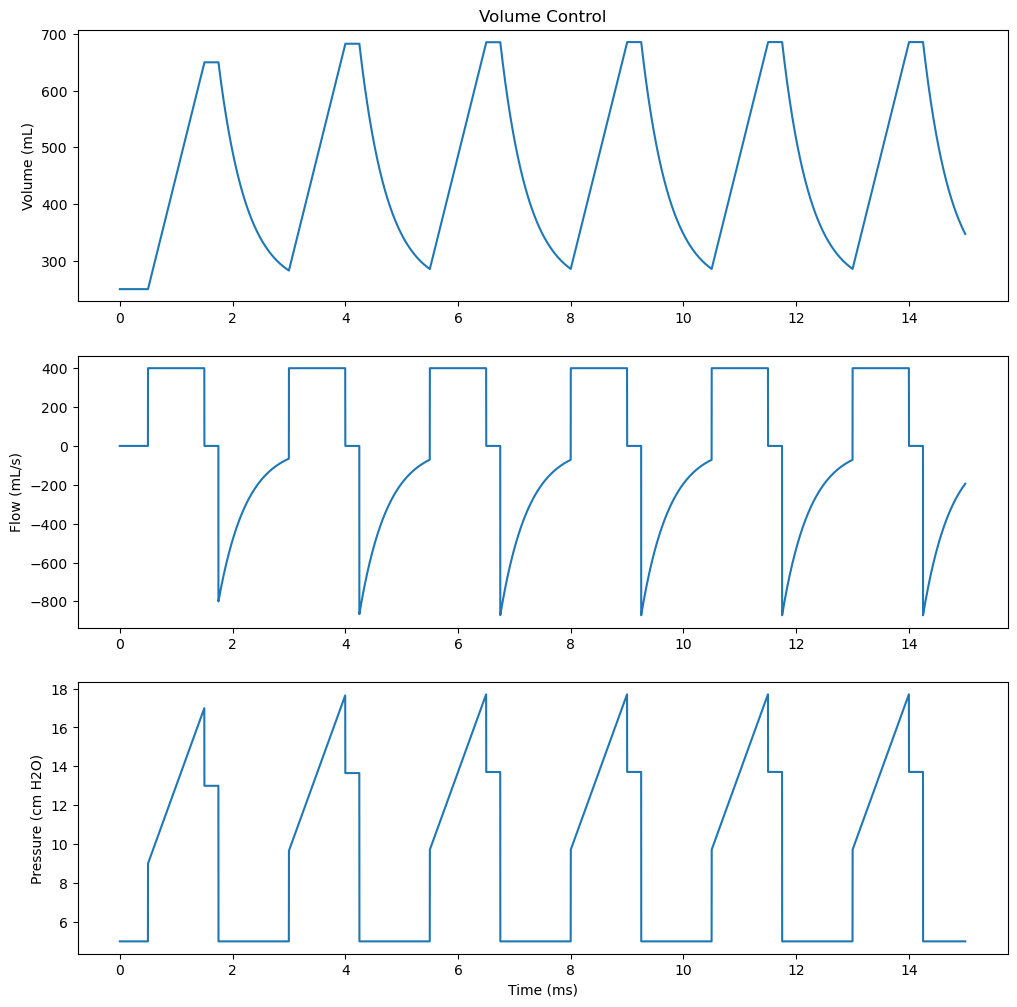

In [14]:
import numpy as np
import matplotlib.pyplot as plt

R = 0.01 #2-3 cm H2O/L/s, converted to cm H2O/mL/s. normal <10 cm H2O/L/s
C = 50 #50-100 mL/cm H2O
titalvolume = 400
RR = 24
breathduration=1
inspiratoryhold = 0.25
peep = 5

def dv(v,p): #pressure is controlled
    return(p/R - v/(R*C))

def dp(v,vdot): #flow is controlled
    return(R*vdot + v/C)

dt = 0.001
T = 15 - dt/2
t = np.arange(0,T+dt/2,dt)
Ps = np.arange(0,T+dt/2,dt)
Vs = np.arange(0,T+dt/2,dt)
Vsdot = np.arange(0,T+dt/2,dt)

Vs[0] = C*peep

inspiretime = 1
timenextbreath = 0.5
for i in range(len(t)):
    thistime = t[i]
    if (t[i] > timenextbreath - dt/2 and t[i] < timenextbreath + breathduration):
        Vsdot[i] = titalvolume/breathduration
        if (i < len(t)-1):
            Vs[i+1] = Vs[i] + dt*Vsdot[i]
        Ps[i] = dp(Vs[i],Vsdot[i])
    elif (t[i] > timenextbreath + breathduration - dt/2 and t[i] < timenextbreath + breathduration + inspiratoryhold):
        Vsdot[i] = 0
        if (i < len(t)-1):
            Vs[i+1] = Vs[i] + dt*Vsdot[i]
        Ps[i] = dp(Vs[i],Vsdot[i])
    else:
        Ps[i] = peep
        Vsdot[i] = dv(Vs[i],Ps[i])
        if (i < len(t)-1):
            Vs[i+1] = Vs[i] + dt*Vsdot[i]
    
    if (thistime > timenextbreath + breathduration + inspiratoryhold + dt/2):
        timenextbreath = timenextbreath + 60/RR

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.title('Volume Control')
plt.plot(t,Vs)
plt.ylabel('Volume (mL)')
plt.subplot(3,1,2)
plt.plot(t,Vsdot)
plt.ylabel('Flow (mL/s)')
plt.subplot(3,1,3)
plt.plot(t,Ps)
plt.xlabel('Time (ms)')
plt.ylabel('Pressure (cm H2O)')

plt.show()
#plt.savefig('volumecontrol.png')